# 23rd December 2020

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# First attempt at Image Processing

In [ ]:
# Learning Process of how to self teach myself how to do Image Processing for CNN's
# Not knowing how to correctly Image Process I was trying to concatenate the pictures themselves to get shape for analysis which was obviously wrong
# I managed to later improve my ablities after this.
# Trying to apply Function sectioning to make code easier

In [ ]:
# Read all data from folder 
# Then concatenate them all together to make dataset
# Then reshape into (-1,150,150,3)

In [ ]:
image = np.array(Image.open('/content/seg_train/buildings/0.jpg'))
print(image.shape)

(150, 150, 3)


In [ ]:
# Load image 
im = Image.open(input_img_path)
# Smaller image/ preserve the aspect of the image
resized_im = im.thumbnail(<maxwidth>, <maxheight>)
# Or Resize image to exact specified size
resized_im = im.resize(<width>, <height>) 

SyntaxError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 150, 150, 3)


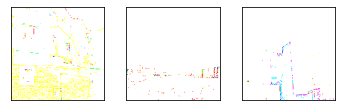

In [ ]:
content = []
zero = np.zeros(202500)
zero = zero.reshape((3,150,150,3))
for img in glob.glob("/content/seg_train/buildings/*.jpg"):
  cv_2 = np.array(Image.open(img))
  image1 = cv_2.reshape((150,150,3))
  content.append(image1)
  for i in range(len(content)):
    zero[i] = content[i]
print(zero.shape)
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(zero[i])
plt.show()


In [ ]:
def image_extractor(pathway):
  content = []
  for img in glob.glob(pathway):
      cv_2 = np.array(Image.open(img)) # Load images and add it list 
      content.append(cv_2.shape)


  content_2 = cv.concatenate(content[0:(len(content))])# It does what we need however it misses an image, probably last image
    
  #cv_img2 = content_2.reshape(-1,150,150,3) # I reshape the array into the amount of images(-1) the height and width(150) and the colour channels(3)
  #print(cv_img2.shape)

# Below allows me to visualise the images
  fig, ax = plt.subplots(1,figsize=(16, 8))
  fig.tight_layout()

  ax.imshow(cv.cvtColor(content_2, cv.COLOR_BGR2RGB))
  ax.set_title("Original")

  plt.show()
  return content_2




In [ ]:
cv_build = image_extractor("/content/seg_train/buildings/*.jpg")
#0 - 3082.jpg = 320 images
#2,191 / 320 = 6.846875 different folders or 7, 320 images each 
#cv_forest = image_extractor(path)
print(cv_build.shape)

AttributeError: ignored

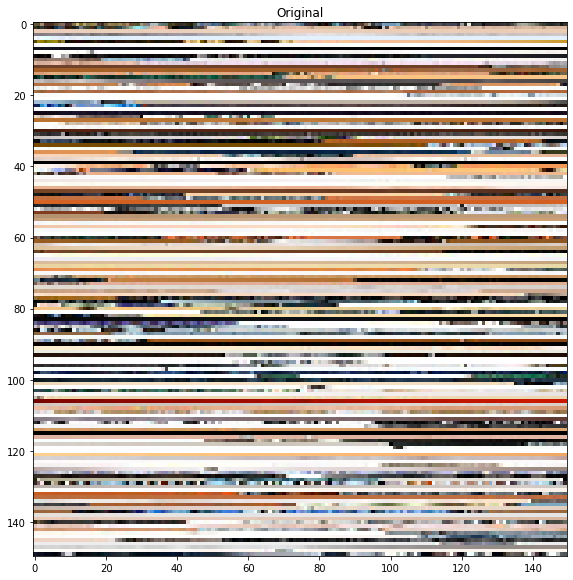

In [ ]:
cv_build_re = cv_build.reshape(-1,150,150,3)
fig, ax = plt.subplots(1,figsize=(16, 8))
fig.tight_layout()

ax.imshow(cv.cvtColor(cv_build_re[0], cv.COLOR_BGR2RGB)) # Visualise it
ax.set_title("Original")

plt.show()

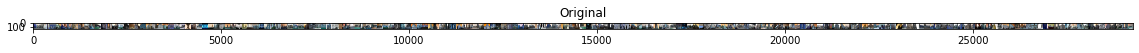

(150, 29250, 3)


In [ ]:
# Had to do it several times because there was an error that didn't allow me to load them all in
cv_build_2 = image_extractor("/content/seg_train/buildings/buildings 2/*.jpg")
print(cv_build_2.shape)
#3086 - 5048 = 198 images


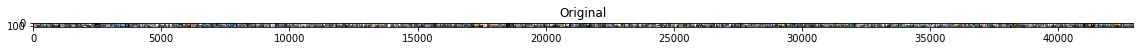

(150, 42900, 3)


In [ ]:
cv_build_3 = image_extractor("/content/seg_train/buildings/buildings 3/*.jpg")
print(cv_build_3.shape)
#20054 - 17495 = 286 images

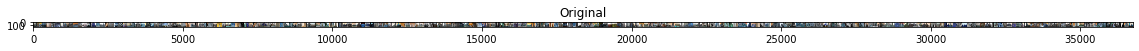

(150, 36750, 3)


In [ ]:
cv_build_4 = image_extractor("/content/seg_train/buildings/buildings 4/*.jpg")
print(cv_build_4.shape)
#17491 - 15320 = 245 Images

In [ ]:

#cv_build, 2, 3 ,4
#cv_build = np.concatenate((cv_build,cv_build_2))
#cv_build = np.concatenate((cv_build,cv_build_3))
#cv_build = np.concatenate((cv_build,cv_build_4))
#print(cv_build.shape)

cv_build = np.concatenate((cv_build,cv_build_2),axis = 1)
print(cont.shape)


(150, 77250, 3)


'\ncmd = cv.hconcat(cv_build_2,cv_build_3)\n#print(cmd.shape)\ncm = cmd.reshape(-1,150,150,3)\nprint(cm.shape)  \n'

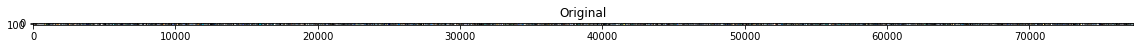

In [ ]:
  fig, ax = plt.subplots(1,figsize=(16, 8))
  fig.tight_layout()

  ax.imshow(cv.cvtColor(cont, cv.COLOR_BGR2RGB))
  ax.set_title("Original")

  plt.show()

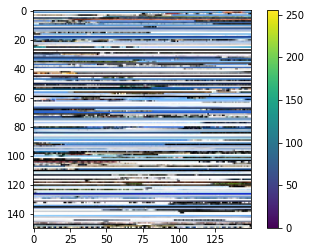

In [ ]:
plt.figure()
plt.imshow(cv_build[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:

#print(cv_build_3.shape)
# 5053 - 6045 = 
def image_ext(pathway):
  content = []
  for img in glob.glob(pathway):
      cv_2 = np.array(Image.open(img))
      content.append(cv_2)
  print(len(content))
cv_build_3 = image_ext("/content/seg_train/buildings/buildings 3/*.jpg")

95


(150, 450, 3)


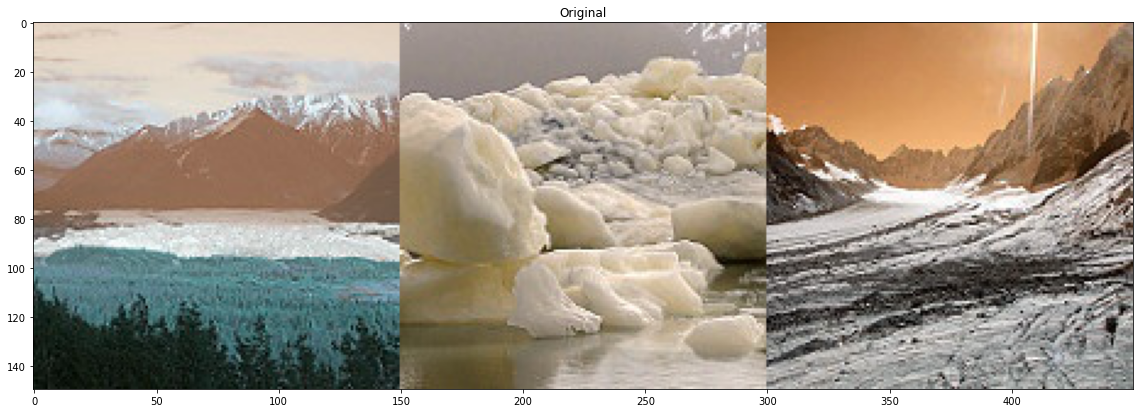

In [ ]:
#concatenates but it would be hard to loop through all pictures
def image_extractor(pathway):
  content = []
  for img in glob.glob(pathway):
      cv_2 = Image.open(img)
      content.append(cv_2)  # Opens file then adds it to content list
  def get_concat_h(im1, im2,im3): # Function that concatenates image 
    dst = Image.new('RGB', (im1.width + im2.width + im3.width, im1.height)) # Creates canvas and concatenates widths with normal height
    dst.paste(im1, (0, 0)) # Then pastes it read on how this works
    dst.paste(im2, (im1.width, 0))
    dst.paste(im3, (im2.width+im1.width, 0))
    return dst                                    
  cont_image = get_concat_h(content[0],content[1],content[2])

  return cont_image

cv_build = image_extractor("/content/seg_train/glacier/*.jpg")

cv_build_2 = np.array(cv_build)
#cv_build_2 = cv_build_2.reshape(-1,150,150,3)
print(cv_build_2.shape)


fig, ax = plt.subplots(1,figsize=(16, 8))
fig.tight_layout()

ax.imshow(cv.cvtColor(cv_build_2, cv.COLOR_BGR2RGB))
ax.set_title("Original")

plt.show()
#cv2.cvtColor(np.float32(imgUMat), cv2.COLOR_RGB2GRAY)


(150, 150, 3)


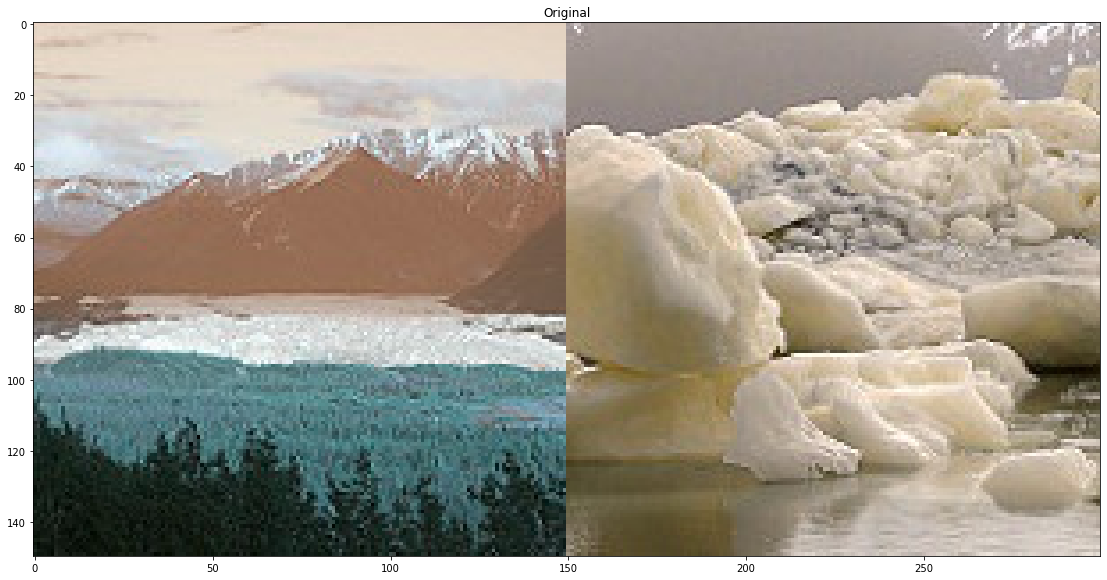

In [ ]:
def image_extractor(pathway):
  content = []
  for img in glob.glob(pathway):
      cv_2 = np.array(Image.open(img))
      content.append(cv_2)

  return content
cv_build = image_extractor("/content/seg_train/glacier/*.jpg")
print(cv_build[0].shape)

def concat(*cont): # Using *arg tring to concxatenate images
  inital_img = np.zeros(67500)
  for c in cont:
    h_img = np.hstack((cont[0],c))
  return h_img

cv_build_3 = concat(cv_build[0],cv_build[1])
fig, ax = plt.subplots(1,figsize=(16, 8))
fig.tight_layout()

ax.imshow(cv.cvtColor(cv_build_3, cv.COLOR_BGR2RGB))
ax.set_title("Original")

plt.show()

In [ ]:
def add(*num):
  total = 0
  for n in num:
    total = total + n
  print(total)
add(2,3,10)

15


In [ ]:
def image_extractor(pathway):
  content = []
  for img in glob.glob(pathway):
      cv_2 = np.array(Image.open(img))
      content.append(cv_2)


  #content_2 = cv.hconcat(content[0:(len(content))])
  #cv_img2 = content_2.reshape(-1,150,150,3)

  return content

cv_build = image_extractor("/content/seg_train/buildings/*.jpg")
#0 - 3082.jpg
# Number of pictures loaded in from buildings: 319 (Works)






#cv_forest = image_extractor(path)
print(len(cv_build))

645


In [ ]:
cv_build_2 = image_extractor("/content/seg_train/buildings_2/*.jpg")
print(cv_build_2.shape)#3086 - 5048
# Number of pictures loaded in from buildings: 365 (error)

In [ ]:
def normalise(data):
  return data / 255
X_train = normalise(X_train)
X_test = normalise(X_test)